In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
def read_csv_in_folder_and_fill_nans(path_to_folder, verbose):
    path_to_folder += "/measurement"
    file_in_folder = [file for file in os.listdir(path_to_folder) if os.path.isfile(os.path.join(path_to_folder, file))]

    dataframe_list = []
    for file in file_in_folder:
        temp_df = pd.read_csv(path_to_folder+"/"+file)
        temp_df.insert(0, 'Index', [index for index in range(len(temp_df))])
        temp_df = temp_df.fillna(0)
        dataframe_list.append(temp_df)
        if verbose:
            print(temp_df)

    if verbose:
        print(f"\nProcessed {len(file_in_folder)} files {file_in_folder} from folder '{path_to_folder}' ")
    return dataframe_list

In [14]:
dataframe_list_original = read_csv_in_folder_and_fill_nans("files/2023_4_27", True)

      Index Input                     Time   Latitude  Longitude       Pitch         Yaw      Roll  Status
0         0  SMAR   2023-04-27 09:17:38.93  46.065725  11.096977  308.440000  348.450000  1.030000     0.0
1         1  SMAR  2023-04-27 09:17:38.976  46.065725  11.096977  308.110000  348.290000  1.130000     0.0
2         2  STON  2023-04-27 09:17:38.976  46.065727  11.096975   -1.320550  278.167557  0.068637     1.0
3         3  SMAR  2023-04-27 09:17:39.014  46.065725  11.096977  307.730000  348.480000  1.010000     0.0
4         4  SMAR  2023-04-27 09:17:39.036  46.065725  11.096977  308.120000  348.500000  0.990000     0.0
...     ...   ...                      ...        ...        ...         ...         ...       ...     ...
1043   1043  SMAR  2023-04-27 09:18:07.332  46.065702  11.096988  296.340000  357.660000  0.030000     0.0
1044   1044  SMAR  2023-04-27 09:18:07.363  46.065702  11.096988  296.300000  357.500000  0.150000     0.0
1045   1045  SMAR  2023-04-27 09:18:0

In [15]:
def clean_dataframe(dataframe_list, verbose):
    cleaned_dataframe_list = []
    for df_index, df in enumerate(dataframe_list):
        for row in range(len(df)):
            if df.loc[row, 'Pitch'] == 0 and df.loc[row, 'Yaw'] == 0 and df.loc[row, 'Roll'] == 0 :
                df = df.drop([row], axis=0) # This is a copy
            elif df.loc[row, 'Latitude'] == 0 or df.loc[row, 'Longitude'] == 0:
                df = df.drop([row], axis=0) # This is a copy
            #TODO: add other cases linked with not sufficient accuracy...
            else:
                df.loc[row,'Time'] = df.loc[row,'Time'][0:23]
        df = df.reset_index(drop=True)
        cleaned_dataframe_list.append(df) # So we need to reassign the new modified copy to the original list

    if verbose:
        for clean_df in cleaned_dataframe_list:
            print(clean_df)
    return cleaned_dataframe_list

In [16]:
dataframe_list_cleaned = clean_dataframe(dataframe_list_original, True)

      Index Input                     Time   Latitude  Longitude       Pitch         Yaw      Roll  Status
0         0  SMAR   2023-04-27 09:17:38.93  46.065725  11.096977  308.440000  348.450000  1.030000     0.0
1         1  SMAR  2023-04-27 09:17:38.976  46.065725  11.096977  308.110000  348.290000  1.130000     0.0
2         2  STON  2023-04-27 09:17:38.976  46.065727  11.096975   -1.320550  278.167557  0.068637     1.0
3         3  SMAR  2023-04-27 09:17:39.014  46.065725  11.096977  307.730000  348.480000  1.010000     0.0
4         4  SMAR  2023-04-27 09:17:39.036  46.065725  11.096977  308.120000  348.500000  0.990000     0.0
...     ...   ...                      ...        ...        ...         ...         ...       ...     ...
1043   1043  SMAR  2023-04-27 09:18:07.332  46.065702  11.096988  296.340000  357.660000  0.030000     0.0
1044   1044  SMAR  2023-04-27 09:18:07.363  46.065702  11.096988  296.300000  357.500000  0.150000     0.0
1045   1045  SMAR  2023-04-27 09:18:0

In [17]:
def separate_stonex_smartphone_data(dataframe_list, verbose):
    stonex_dataframe_list = []
    smartphone_dataframe_list = []
    joint_time_dataframe_list = []
    for df in dataframe_list:
        temp_stonex_df = pd.DataFrame(columns=df.columns)
        temp_smartphone_df = pd.DataFrame(columns=df.columns)

        for row in range(len(df)):
            if df.loc[row, 'Input'] == "STON":
                temp_stonex_df.loc[row] = df.iloc[row]
            elif df.loc[row, 'Input'] == "SMAR":
                temp_smartphone_df.loc[row] = df.iloc[row]

        temp_stonex_df.reset_index(drop=True)
        temp_smartphone_df.reset_index(drop=True)

        joint_time_dataframe_list.append(df['Time'])

        stonex_dataframe_list.append(temp_stonex_df)
        smartphone_dataframe_list.append(temp_smartphone_df)
        if verbose:
            print(temp_stonex_df)
            print(temp_smartphone_df)
            print(df['Time'])

    return stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list

In [18]:
stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list = separate_stonex_smartphone_data(dataframe_list_cleaned, True)

     Index Input                     Time   Latitude  Longitude     Pitch         Yaw      Roll Status
2        2  STON  2023-04-27 09:17:38.976  46.065727  11.096975  -1.32055  278.167557  0.068637    1.0
6        6  STON   2023-04-27 09:17:39.08  46.065727  11.096975 -1.320719   278.16571  0.067495    1.0
13      13  STON  2023-04-27 09:17:39.273  46.065727  11.096975 -1.322136  278.151855  0.068477    1.0
18      18  STON  2023-04-27 09:17:39.405  46.065727  11.096975 -1.322136  278.151855  0.068477    1.0
19      19  STON  2023-04-27 09:17:39.405  46.065727  11.096975 -1.322136  278.151855  0.068477    1.0
...    ...   ...                      ...        ...        ...       ...         ...       ...    ...
1021  1021  STON  2023-04-27 09:18:06.703  46.065727  11.096975 -1.354568  278.049171  0.010227    1.0
1027  1027  STON  2023-04-27 09:18:06.865  46.065727  11.096975 -1.355729  278.052902  0.009919    1.0
1034  1034  STON  2023-04-27 09:18:07.068  46.065727  11.096975 -1.355256

In [ ]:
# The 3 cells here below are used to adjust data (cell 1, it will be removed) and to plot just 1 dataframe (cell 2-3)

In [ ]:
# We need to invert the polarity of the stonex yaw, and to add 180 degrees to move it from [-180,180]° to  [0,360]°
for dataframe in stonex_dataframe_list:
    for row in range(len(dataframe)):
        dataframe.iloc[row,6] = -dataframe.iloc[row,6] + 180

In [33]:
def plot_data_over_time(stonex_dataframe, smartphone_dataframe, joint_time_dataframe, full_data=False, n_ticks=25):
    parameters = ["Pitch","Yaw","Roll"]
    parameters_extension = ["Latitude","Longitude"]
    if full_data:
        parameters.extend(parameters_extension)
    n_rows = len(parameters)

    fig, ax_list = plt.subplots(nrows=n_rows)
    for param_index, parameter in enumerate(parameters):
        ax_list[param_index].plot(stonex_dataframe['Index'], stonex_dataframe[parameter], label="Stonex")
        ax_list[param_index].plot(smartphone_dataframe['Index'], smartphone_dataframe[parameter], label="Smartphone")

        ax_list[param_index].set_title(f"'{parameter}' over time")
        ax_list[param_index].legend()
        if parameter not in parameters_extension:
            ax_list[param_index].set_ylabel("Degrees")
        else:
            for index, extra_parameter in enumerate(parameters_extension):
                if extra_parameter == parameters_extension[index]:
                    ax_list[param_index].set_ylabel(parameters_extension[index])
                    break

        # ax_list[param_index].locator_params(axis='x', nbins=1)
        ax_list[param_index].set_xticks([i for i in range(len(joint_time_dataframe))], joint_time_dataframe.to_list(), rotation=45)

        ticks_freq = int(len(joint_time_dataframe)/n_ticks)
        for n, label in enumerate(ax_list[param_index].xaxis.get_ticklabels()):
            if n % ticks_freq != 0:
                label.set_visible(False)

    fig.autofmt_xdate()
    fig.set_figwidth(15)
    fig.set_figheight(5*n_rows)
    # fig.subplots_adjust(hspace=1.2)
    plt.show()

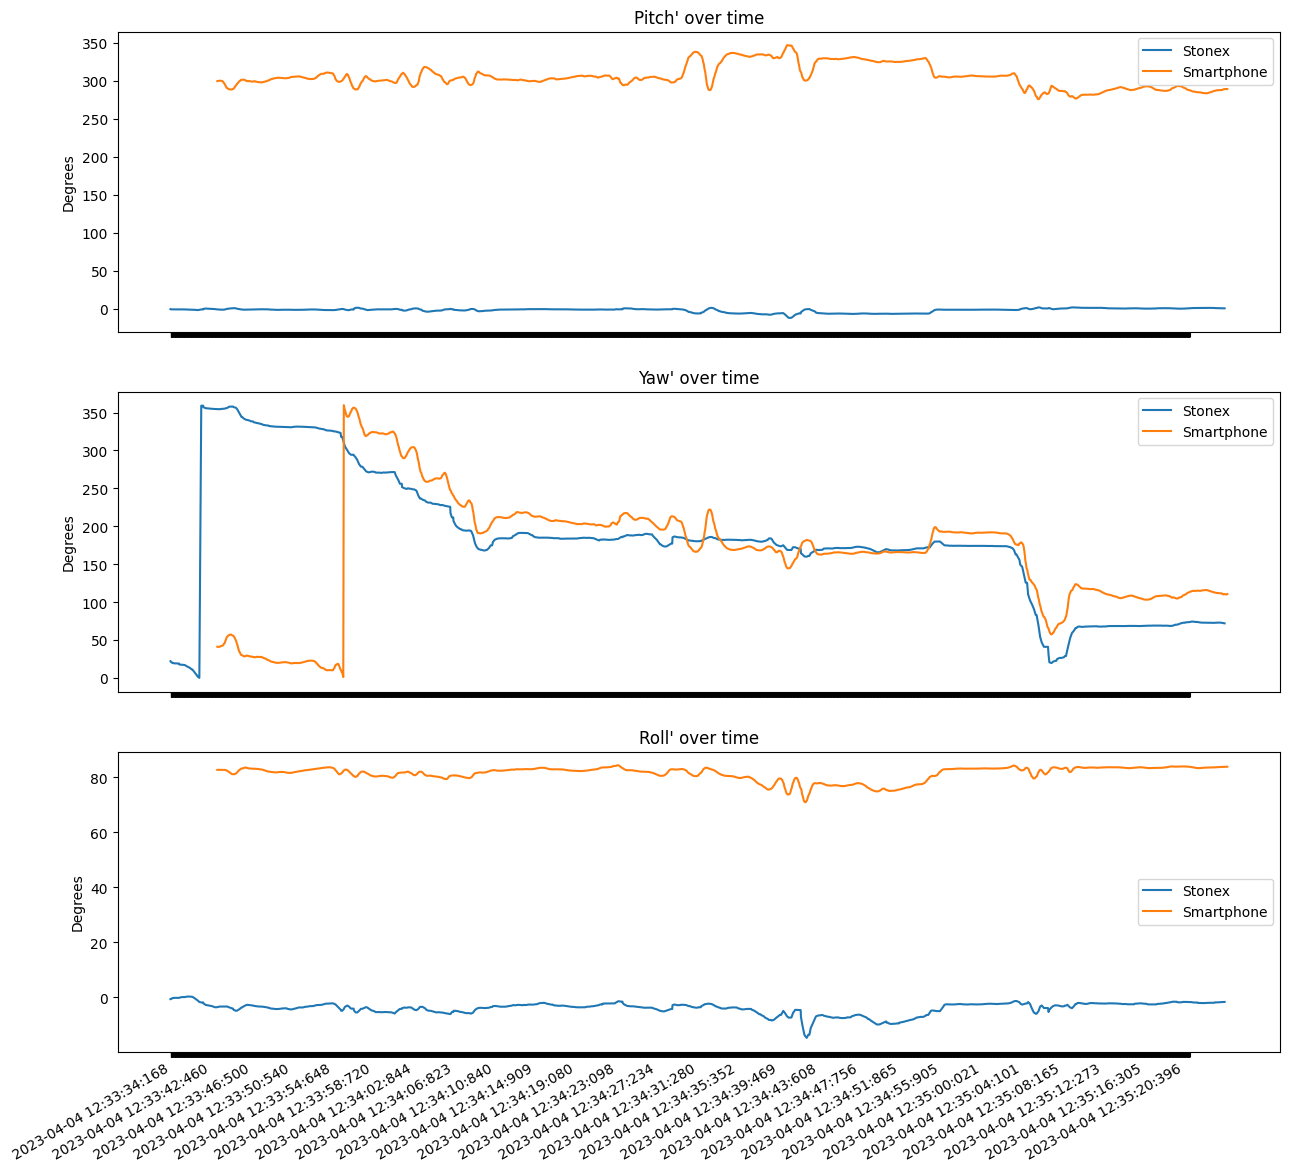

In [34]:
plot_data_over_time(stonex_dataframe_list[1], smartphone_dataframe_list[1], joint_time_dataframe_list[1], False)

In [19]:
def plot_list_data_over_time(stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list, full_data=False, n_ticks=25):
    assert len(stonex_dataframe_list) == len(smartphone_dataframe_list), "The lists must encompass the same number of dataframes to carry out the comparison"

    ax_list = []
    parameters = ["Pitch","Yaw","Roll"]
    parameters_extension = ["Latitude","Longitude"]
    if full_data:
        parameters.extend(parameters_extension)
    n_rows = len(parameters)

    for df in range(len(stonex_dataframe_list)):
        fig, ax_list = plt.subplots(nrows=n_rows)
        for param_index, parameter in enumerate(parameters):
            ax_list[param_index].plot(stonex_dataframe_list[df]['Index'], stonex_dataframe_list[df][parameter], label="Stonex")
            ax_list[param_index].plot(smartphone_dataframe_list[df]['Index'], smartphone_dataframe_list[df][parameter], label="Smartphone")

            ax_list[param_index].set_title(f"File {df}: '{parameter}' over time")
            ax_list[param_index].legend()
            if parameter not in parameters_extension:
                ax_list[param_index].set_ylabel("Degrees")
            else:
                for index, extra_parameter in enumerate(parameters_extension):
                    if extra_parameter == parameters_extension[index]:
                        ax_list[param_index].set_ylabel(parameters_extension[index])
                        break

            # ax_list[param_index].locator_params(axis='x', nbins=1)
            ax_list[param_index].set_xticks([i for i in range(len(joint_time_dataframe_list[df]))], joint_time_dataframe_list[df].to_list(), rotation=45)

            ticks_freq = int(len(joint_time_dataframe_list[df])/n_ticks)
            for n, label in enumerate(ax_list[param_index].xaxis.get_ticklabels()):
                if n % ticks_freq != 0:
                    label.set_visible(False)

        fig.autofmt_xdate()
        fig.set_figwidth(15)
        fig.set_figheight(5*n_rows)
        # fig.subplots_adjust(hspace=1.2)
        plt.show()

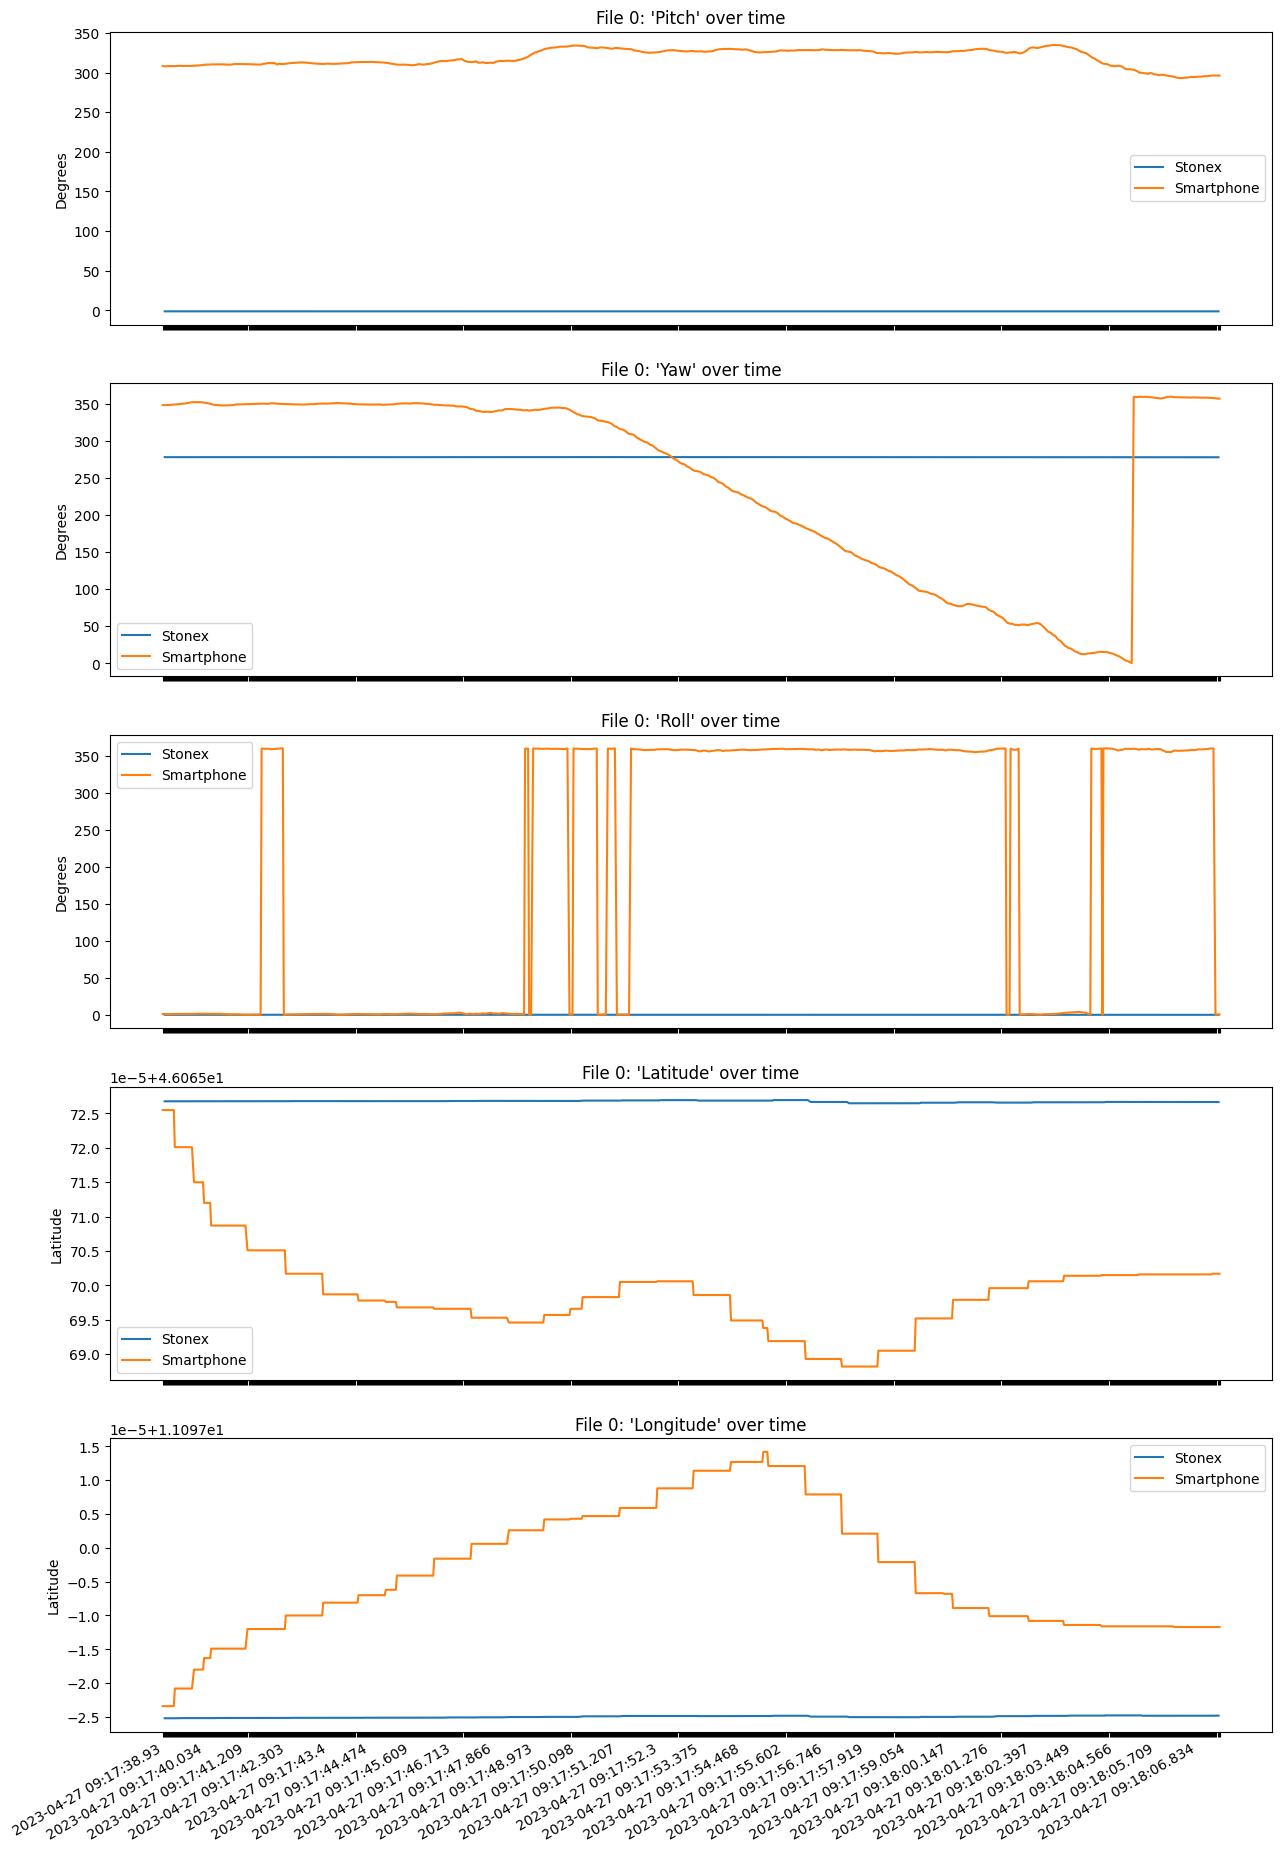

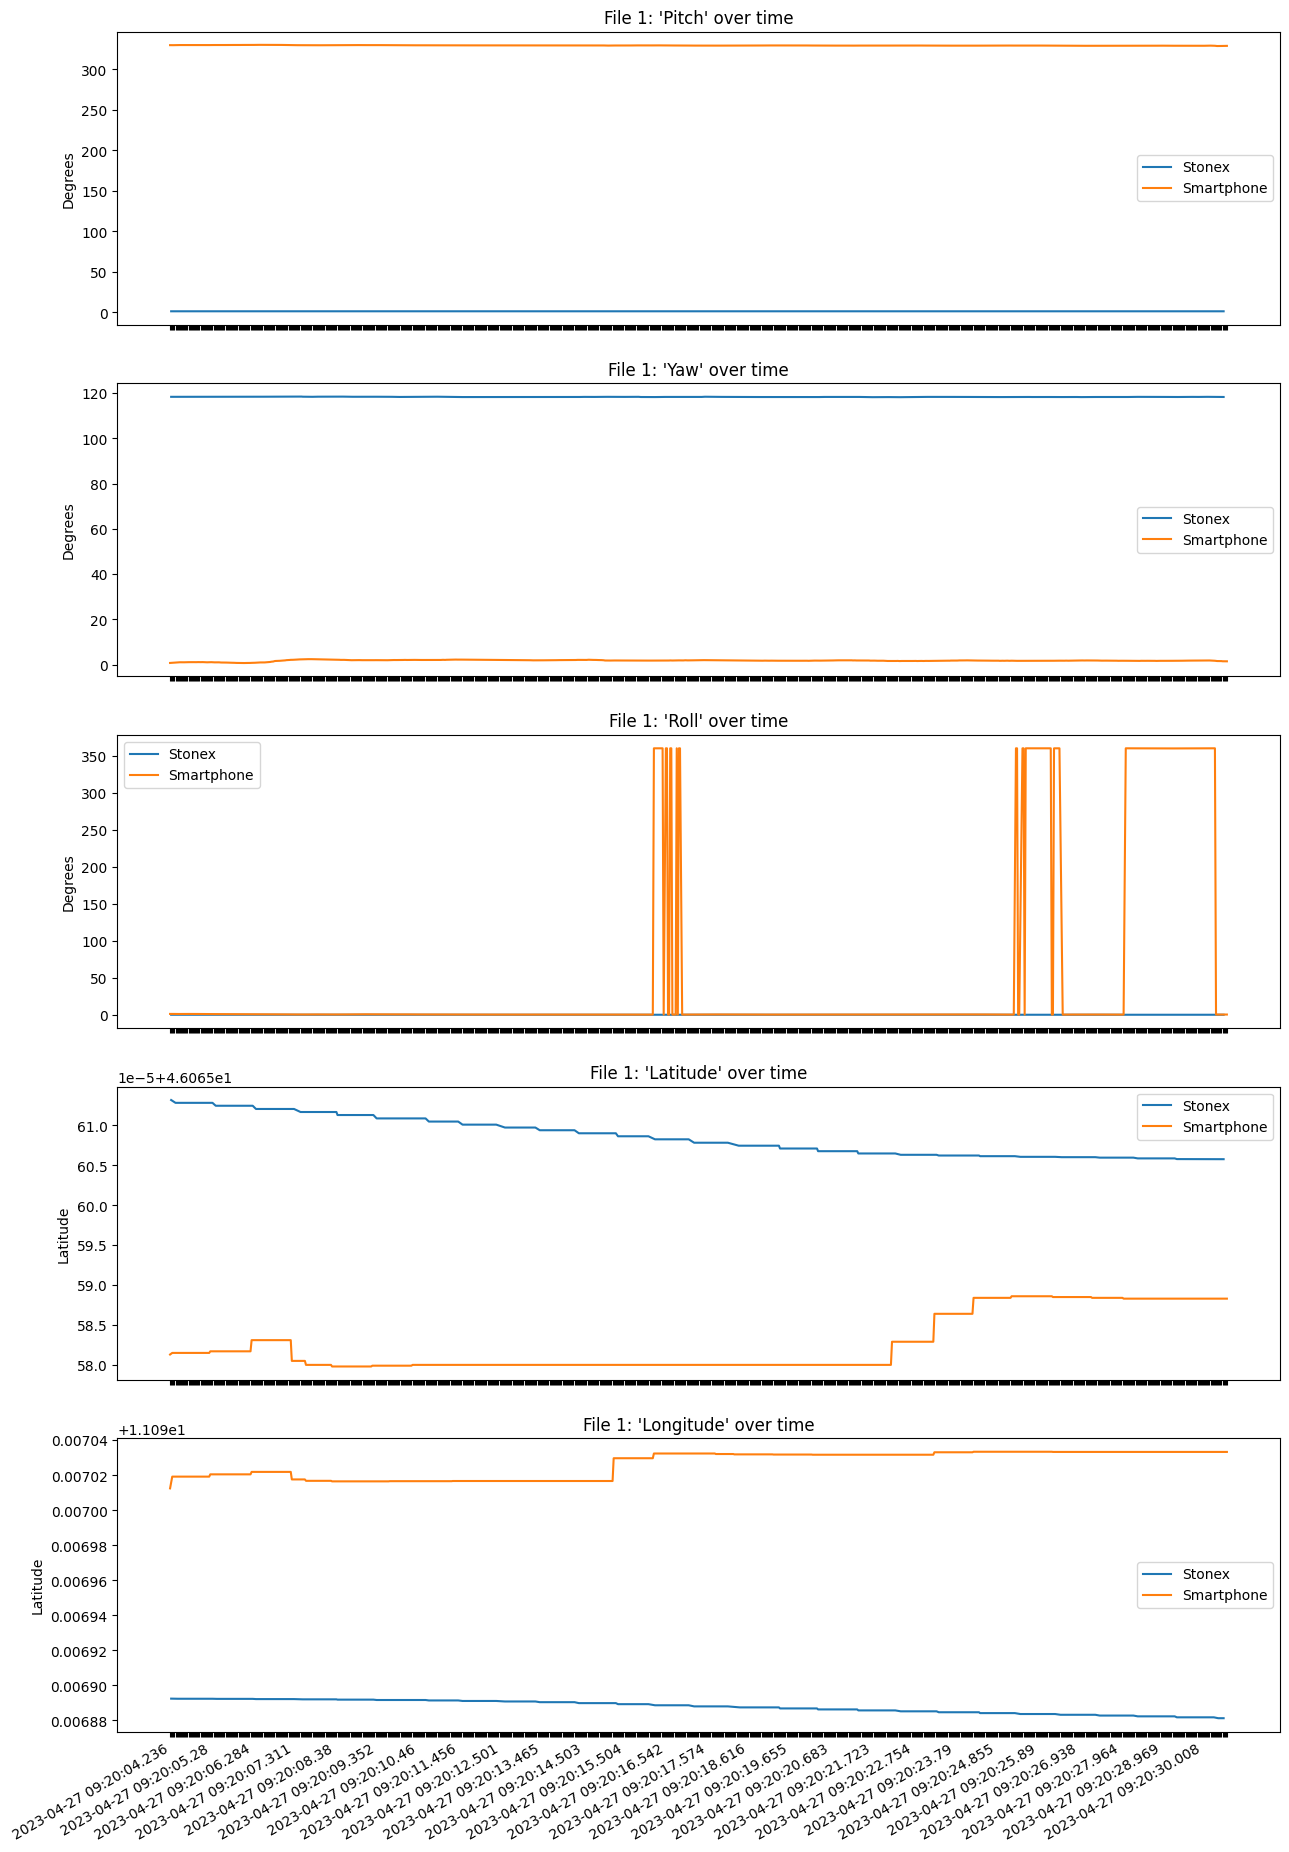

In [20]:
plot_list_data_over_time(stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list, True)

In [21]:
def scatter_latitude_longitude_data(stonex_dataframe_list, smartphone_dataframe_list):
    assert len(stonex_dataframe_list) == len(smartphone_dataframe_list), "The lists must encompass the same number of dataframes to carry out the comparison"

    ax_list = []
    n_rows = len(stonex_dataframe_list)

    fig, ax_list = plt.subplots(nrows=n_rows)
    for df in range(len(stonex_dataframe_list)):
        ax_list[df].scatter(stonex_dataframe_list[df]['Latitude'], stonex_dataframe_list[df]['Longitude'], label="Stonex")
        ax_list[df].scatter(smartphone_dataframe_list[df]['Latitude'], smartphone_dataframe_list[df]['Longitude'], label="Smartphone")

        ax_list[df].set_title(f"File {df}: Latitude-Longitude scatter")
        ax_list[df].set_xlabel("Latitude")
        ax_list[df].set_ylabel("Longitude")
        ax_list[df].legend()

    fig.set_figwidth(15)
    fig.set_figheight(5*n_rows)
    plt.legend()
    plt.show()

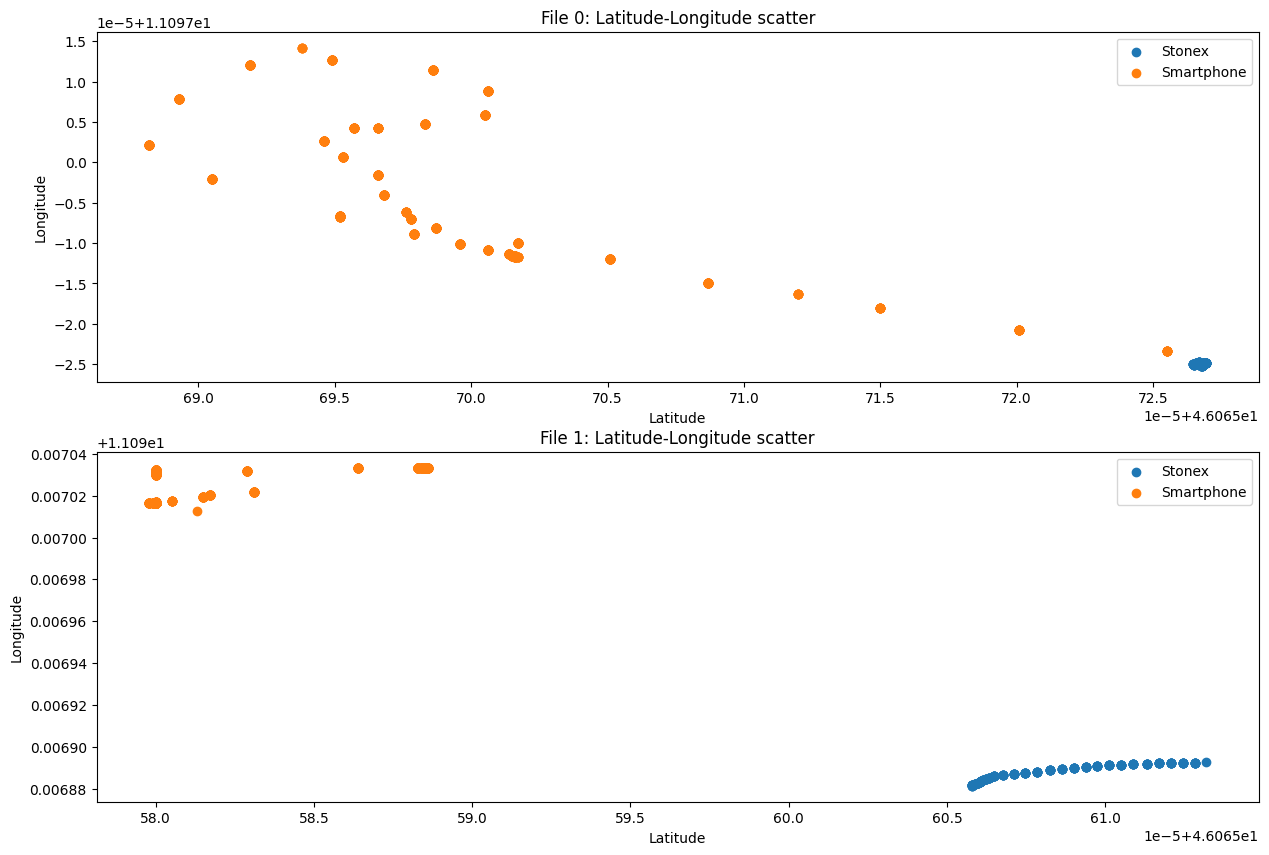

In [22]:
scatter_latitude_longitude_data(stonex_dataframe_list, smartphone_dataframe_list)